In [79]:
import sys
sys.path.insert(0, '..')
import os
import glob
import numpy as np
from filament import filament
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cartopyticker
import matplotlib.ticker as mticker
coast = cfeature.GSHHSFeature(scale="f")
from importlib import reload
reload(filament)

<module 'filament.filament' from '../filament/filament.py'>

In [80]:
winddir = "/data/Wind/CCMP/"
year = 2010
month = 1
datafile = os.path.join(winddir, f"CCMP_Wind_Analysis_{year}{str(month).zfill(2)}_V02.0_L3.5_RSS.nc")
coordinates = (-20., 0., 15., 35.)
coordinates2 = (coordinates[0] - 0.5, coordinates[1] + 0.5, coordinates[2] - 0.5, coordinates[3] + 0.5)
myproj = cartopy.crs.Mercator(central_longitude=0.5 * (coordinates[0] + coordinates[1]), 
                              min_latitude=coordinates[2], max_latitude=coordinates[3], 
                              globe=None, latitude_true_scale=None)
data_crs = ccrs.PlateCarree()

In [81]:
wind = filament.Wind()
wind.read_from_ccmp(datafile, coordinates)

In [91]:
def plot_wind(wind, coordinates, regionname="Atlantic", figname=""):
    fig = plt.figure(figsize=(12, 12))
    ax = plt.axes(projection=myproj)    
    
    ax.quiver(wind.lon, wind.lat, wind.u, wind.v, wind.speed, transform=data_crs, clim=[0., 15.],
                    scale=500, width=0.0005)

    # EMODnet bathymetry
    #ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms',
    #               layers=['emodnet:mean_atlas_land', 'coastlines'],
    #               transform=myproj, zorder=3)

    # Grid lines and labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=.5, color='gray', alpha=0.5, linestyle='-', zorder=6)

    gl.top_labels = False
    gl.right_labels = False

    if regionname == "Canary":
            gl.xlocator = mticker.FixedLocator(np.arange(-20., -10., 1.))
            gl.ylocator = mticker.FixedLocator(np.arange(26., 31., 0.5))
    elif regionname == "Balearic": 
        gl.xlocator = mticker.FixedLocator(np.arange(1., 4.50001, 0.5))
        gl.ylocator = mticker.FixedLocator(np.arange(38.5, 40.25, 0.5))
    elif regionname == "Atlantic": 
        gl.xlocator = mticker.FixedLocator(np.arange(-20., 0., 5.))
        gl.ylocator = mticker.FixedLocator(np.arange(15., 35., 5.))
    
    ax.add_feature(coast, linewidth=.2, color=".85", zorder=5) 
    
    # Domain extension
    ax.set_extent(coordinates)

    if len(figname) > 0:
        plt.savefig(figname, dpi=300, bbox_inches="tight")
    else:
        plt.show()
    plt.close()

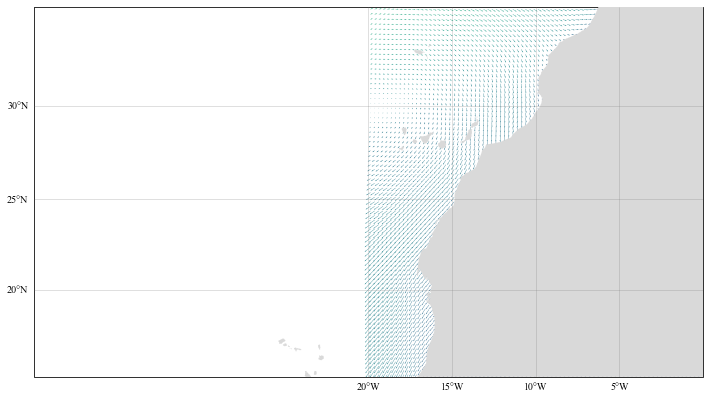

In [92]:
plot_wind(wind, domain)